# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
#loading data
df = pd.read_csv('/data/college_completion.csv',low_memory=False)
#examining
print(df.shape, '\n')
print(df.head(), '\n')

(3798, 63) 

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ..

2: there are 3798 observations, 63 variables included

In [33]:
# Cross tabulate control and level
print(pd.crosstab(df['control'],df['level']),'\n')
print(pd.crosstab(df['control'],df['level'], normalize = 'all'),'\n')

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 



3: Private non-for-profit 4-year colleges are the most common, with almost a third of institutions, followed by public two-year institutions. However, without the data to show the distribution of the other college types, that statement doesn't describe the realities.

<Axes: xlabel='grad_100_value', ylabel='Count'>

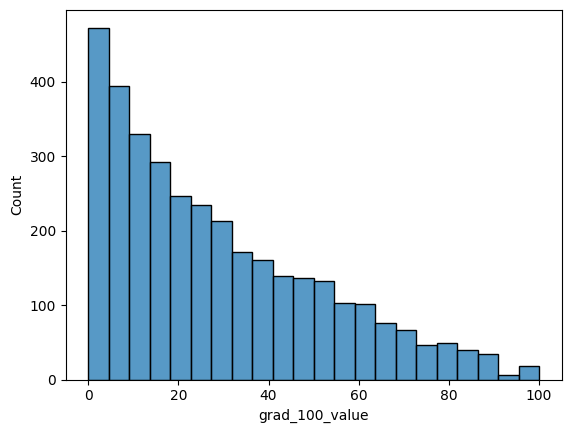

In [34]:
# For grad_100_value, create a histogram
import seaborn as sns
sns.histplot(df['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

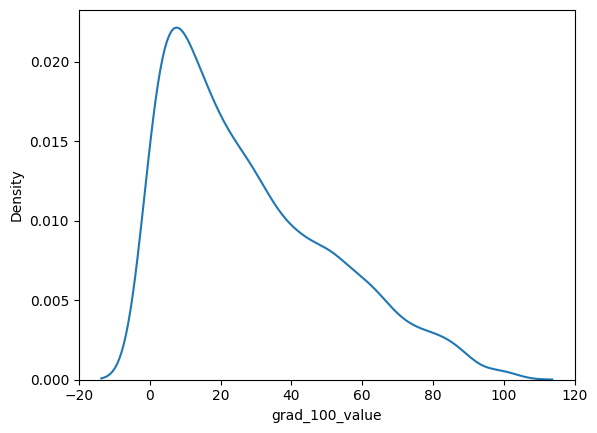

In [35]:
# For grad_100_value, create a kernel density plot
sns.kdeplot(df['grad_100_value'])

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

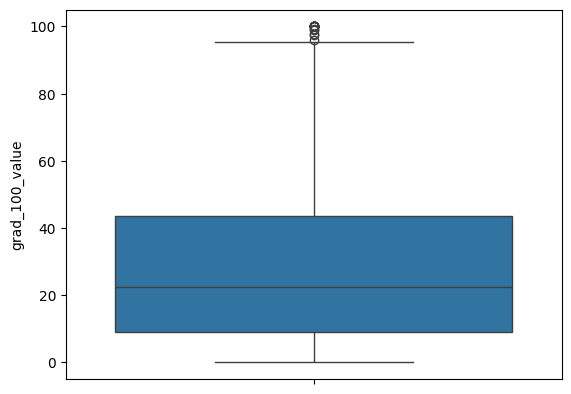

In [36]:
# For grad_100_value, create a boxplot, and statistical description.
sns.boxplot(df['grad_100_value'])
df['grad_100_value'].describe()

<Axes: xlabel='grad_100_value', ylabel='Density'>

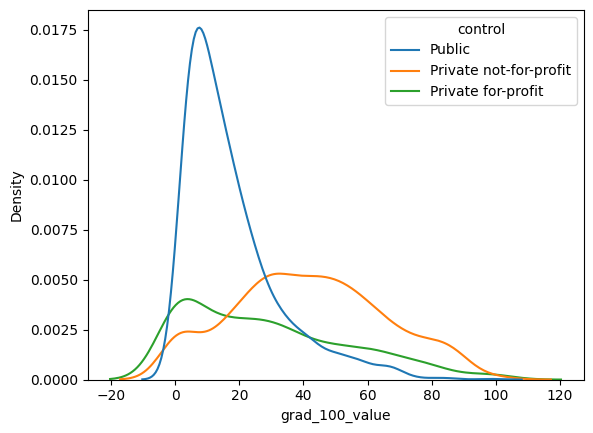

In [37]:
# For grad_100_value, create a grouped kernel density plot by control
sns.kdeplot(data=df,x='grad_100_value',hue='control')

<Axes: xlabel='grad_100_value', ylabel='Density'>

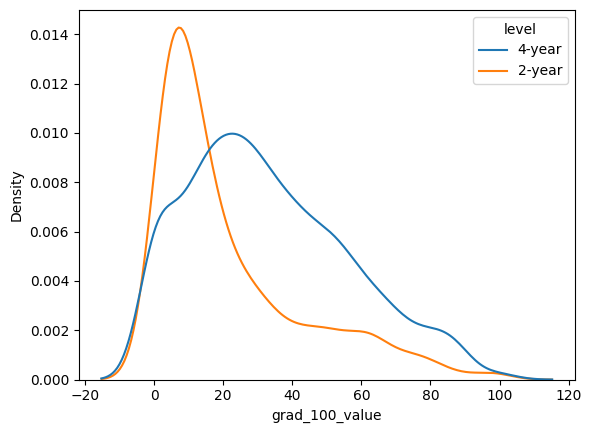

In [38]:
# For grad_100_value, create a grouped kernel density plot by level
sns.kdeplot(data=df,x='grad_100_value',hue='level')

In [39]:
# grouped calculations of statistical descriptions of grad_100_value by control
df.loc[:,['control','grad_100_value']].groupby('control').describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [40]:
# grouped calculations of statistical descriptions of grad_100_value by level
df.loc[:,['level','grad_100_value']].groupby('level').describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

5: 4-year and private not-for-profit institutions have the best graduation rates, shown by the statistical descriptions of grad_100_value.

<Axes: xlabel='grad_100_value', ylabel='Density'>

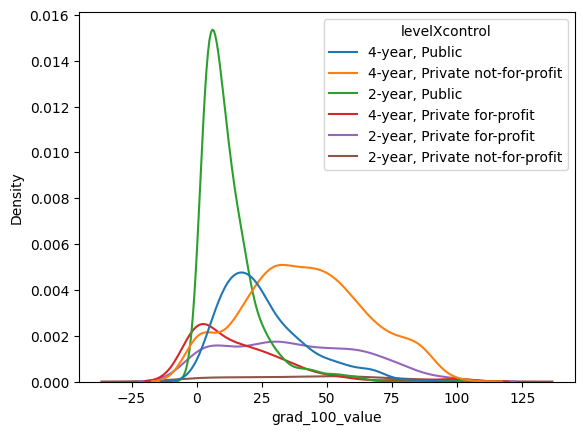

In [41]:
# new variable interacting level and control
df['levelXcontrol']=df['level']+', '+df['control']
# grouped kernel density plot
sns.kdeplot(data=df,x='grad_100_value',hue='levelXcontrol')

In [42]:
# grouped calculations of statistical descriptions of grad_100_value by level & control
df.loc[:,['level','control','grad_100_value']].groupby(['level','control']).describe()

grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public                   5.100   9.4  16.175   97.8  
4-year Private for-profit       0.000  12.5  26.325  100.0  
       Private not-for-profit  25.000  41.0  57.800  100.0  
       Public                  13.600  21.8  33.800   86.3

6: 2-year and 4-year programs from private not-for-profit institutions seem to have the best graduation rates, and don't really differ very much.

<Axes: xlabel='aid_arcsinh', ylabel='Density'>

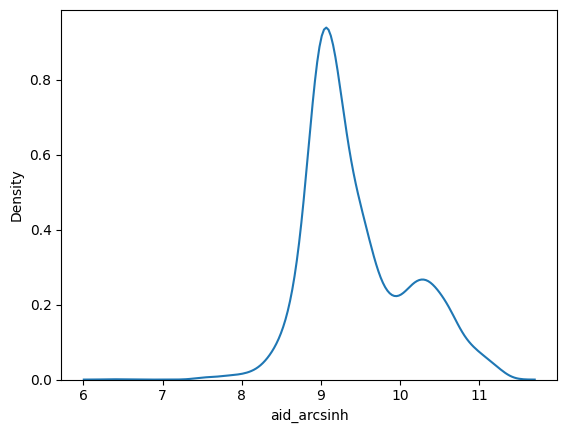

In [43]:
# kernal density plot of aidvalue
df['aid_arcsinh'] = np.arcsinh(df['aid_value'])
sns.kdeplot(data=df,x='aid_arcsinh')

<Axes: xlabel='aid_value', ylabel='Density'>

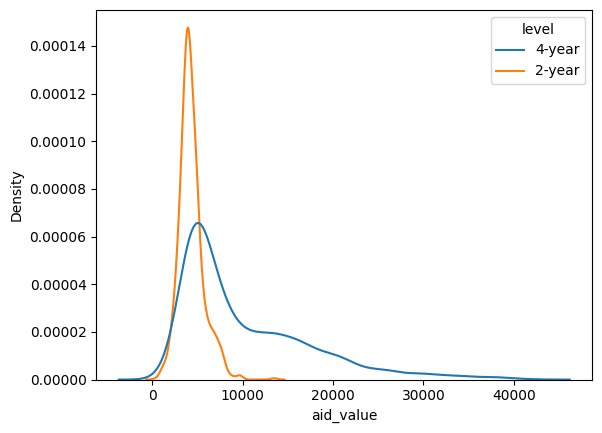

In [44]:
sns.kdeplot(data=df,x='aid_value',hue='level') # grouped by level

<Axes: xlabel='aid_value', ylabel='Density'>

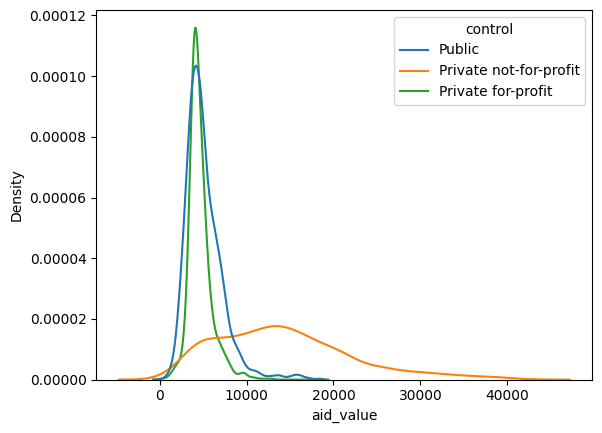

In [45]:
sns.kdeplot(data=df,x='aid_value',hue='control') # grouped by control

In [46]:
df.loc[:,['level','aid_value']].groupby('level').describe()
# grouped calculation of statistical descriptions of aid_value by level

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

In [47]:
# grouped calculations of statistical descriptions of aid_value by control
df.loc[:,['control','aid_value']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

the shape of the graph can best be explained by the stark differences in the amount of aid given by private NFP institutions (significantly more) and public/private FP ones (much less, but similar amounts)

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

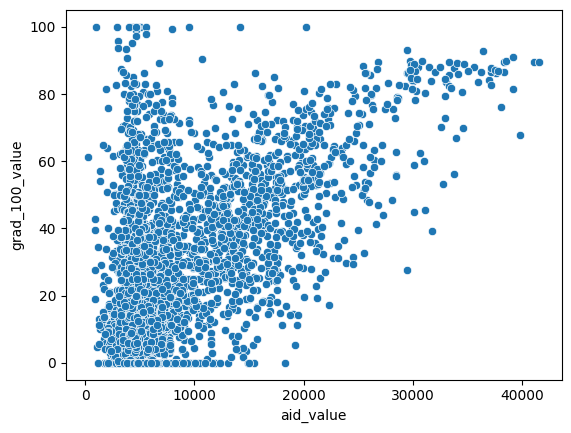

In [48]:
#  scatterplot of grad_100_value by aid_value
sns.scatterplot(data=df,x='aid_value',y='grad_100_value')

In this scatterplot, I see there is some positive association between our two variables, grad_100_value and aid_value. There is also a significant group at the left side of the plot where aid_value is low and stagnant but grad_100_value is varied.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

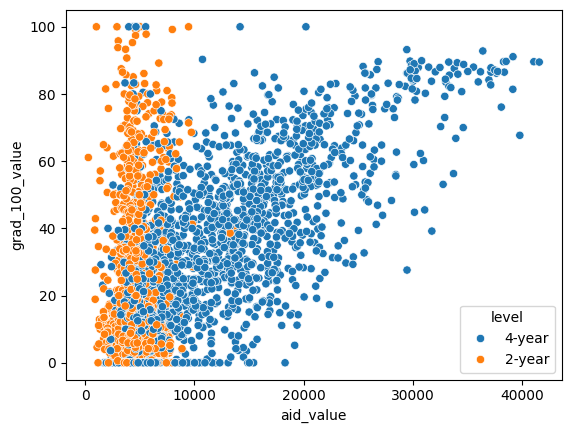

In [49]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='level')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

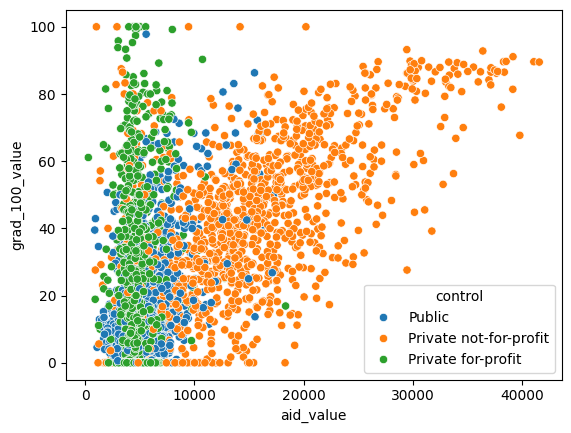

In [50]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='control')

after grouping the scatterplot by level and control, it is obvious that the positive trend observed before is from the 4 year and private NFP institutions. I'd say that aid seems to positively impact graduation rates regardless of the type of institution, but the data is limited since the other insitutions do not give much aid and their graduations rates vary.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

2) I am studying gov payers in healthcare reimbursement for my major, so the Medicare dataset just actually ended up being the one I was interested in!

The data dictionary does document how missing or unknown values are handled. For unknown ones, such as in the case of the ADM_H_MEDSTA variable, they use a number like 3. For missing ones, such as INS_PRIVRX, they use '.' to denote Inapplicable/Missing.

For categorical variables, such as ADM_OP_MDCD and ADM_H_PDRS, they provide a very short description of the possible values, but not enough to actually piece together or understand them in context. For the RDS Indicator for the year variable, they have an inapplicable/missing option along with the various forms of subsidy, but there isn't a description as to what any of the acronyms refer to.

For the numerical variables, there is some ambiguity with the way some values are categorized into large groups, but they do provide a clear description of how missing values are denoted. For example, for HLT_D_VIGTIM, '.' refers to Inapplicable/Missing while '0' refers to 0 Hrs/wk spent doing vigorous activities. This ensures that there is no confusion between a lack of exercise and unknown amounts of exercise.

My general opinion on this dataset is that it provides lots of interesting variables to analyze to get a better insight into the consumers and target demographic of Medicare, and carefully illuminates some of the social determinents of health such as distance to healthcare services, amount of education, wealth, etc. However, one thing I wish was a bit clearer were some of the descriptions provided of the values/variables, since there were many acronyms in the place of important references to insurance and gov. subsidies. I am familiar with many of these terms due to my own subject matter research, but it could be easily confused with other terms.

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns

In [52]:
df = pd.read_csv('/data/puf2021_1_fall.csv', low_memory=False)
print( df.shape, '\n')
df.head()
num_ppl_household = df['HOU_D_HHTOT']
num_ppl_household.tolist() #list of values
num_ppl_household = pd.to_numeric(num_ppl_household) # changes num_ppl_household from string to numeric
#this is crucial since this is a numeric variable, and actually describes the
# number of people living in the household up until 6+
num_ppl_household.unique()
print( df.shape, '\n')
df.head() # same number as before, therefore no missing values

(12783, 337) 

(12783, 337) 



,PUF_ID,SURVEYYR,VERSION,ADM_H_MEDSTA,ADM_H_GHPSW,ADM_H_PDRS,ADM_OP_MDCD,ADM_DUAL_FLAG_YR,ADM_FFS_FLAG_YR,ADM_MA_FLAG_YR,...,PUFF091,PUFF092,PUFF093,PUFF094,PUFF095,PUFF096,PUFF097,PUFF098,PUFF099,PUFF100
0,21000003,2021,1,1,2,1.0,1,1,3,1,...,988.252590,5273.441518,1095.075758,1245.906455,6049.581125,994.556718,5490.385215,1264.822658,5632.555206,989.464837
1,21000004,2021,1,1,2,1.0,1,1,3,1,...,22599.768459,3574.297077,2905.632202,3011.695926,4283.873099,18154.868227,16722.373362,15553.879545,14193.033902,18737.870831
2,21000005,2021,1,1,2,1.0,1,1,3,1,...,3998.371708,3748.552103,574.146156,4082.909199,559.108837,571.423027,3550.951071,4554.459435,605.491265,612.180490
3,21000011,2021,1,1,2,1.0,1,1,3,1,...,5679.361042,982.382754,1046.200903,1103.813758,1085.475033,1231.049575,1157.845607,720.394183,1134.894480,778.578574
4,21000012,2021,1,1,1,1.0,2,3,1,3,...,12188.282713,14418.230488,10457.419141,2761.012141,2160.504248,2346.820214,2230.871858,17188.553558,12597.595445,13900.497117


In [53]:
fall_fear = df['FAL_FALLFEAR'] # fear of falling scale
print(fall_fear.unique(),'\n')
print(fall_fear.value_counts(),'\n')
fall_fear = fall_fear.replace('.',np.nan) # . are the Inapplicable/Missing ones
fall_fear = fall_fear.replace('D',np.nan) # D's are the "Don't know" ones
fall_fear = fall_fear.replace('R',np.nan) # R's are the "Refused" ones
print(fall_fear.value_counts(),'\n')
df['FAL_FALLFEAR'] = fall_fear # replacing data column with cleaned values

[nan '3' '2' '5' 'D' '1' '4' '6' 'R'] 

1    736
3    575
2    540
6    508
4    371
5    278
D     22
R      1
Name: FAL_FALLFEAR, dtype: int64 

1    736
3    575
2    540
6    508
4    371
5    278
Name: FAL_FALLFEAR, dtype: int64 



In [54]:
fall_any = df['FAL_FALLANY'] # has the person fallen down at all in past year
print(fall_any.unique(),'\n')
print(fall_any.value_counts(),'\n')
fall_any = fall_any.replace('.',np.nan) # . are the Inapplicable/Missing ones
fall_any = fall_any.replace('D',np.nan) # D's are the "Don't know" ones
fall_any = fall_any.replace('R',np.nan) # R's are the "Refused" ones
print(fall_any.value_counts(),'\n')
df['FAL_FALLANY'] = fall_any # replacing data column with cleaned values

['2' '1' 'D' 'R' nan] 

2    9701
1    3031
D      38
R       5
Name: FAL_FALLANY, dtype: int64 

2    9701
1    3031
Name: FAL_FALLANY, dtype: int64 



3) I found the variables HOU_D_HHTOT, FAL_FALLFEAR, and FAL_FALLANY to be jointly interesting, as they may reveal how the number of people co-living with an elderly person could positively (or perhaps even negatively) impact the likelihood of falling and/or their fear of falling. I am personally interested in knowing this as someone who lives with 3 elderly grandparents at home, and they are often scared of being in the house alone in case they fall. I don't know how they would fare if they had to live alone, and I predict they'd be scared.


<Axes: xlabel='HOU_D_HHTOT', ylabel='Count'>

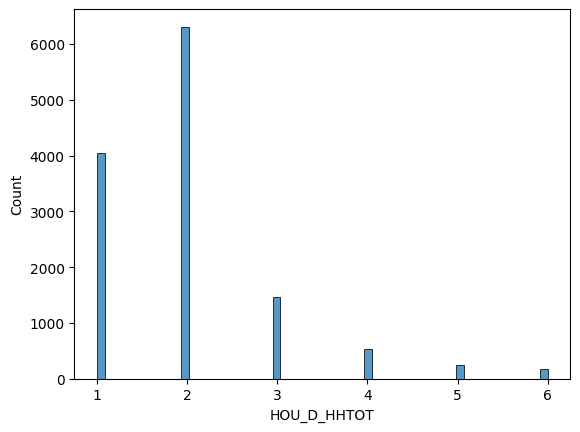

In [67]:
# I would use the HOU_D_HHTOT variable, number of people in a household, as a categorical variable since 6 can
# refer to any number of ppl over 6, and it is simply a way of generally grouping (not for calculations)
# however it could also easily be used as numerical, due to it being a count of frequency (points of data in bins)
# therefore here is a bar/histogram plot of HOU_D_HHTOT
sns.histplot(df['HOU_D_HHTOT'])

<Axes: xlabel='FAL_FALLFEAR', ylabel='Count'>

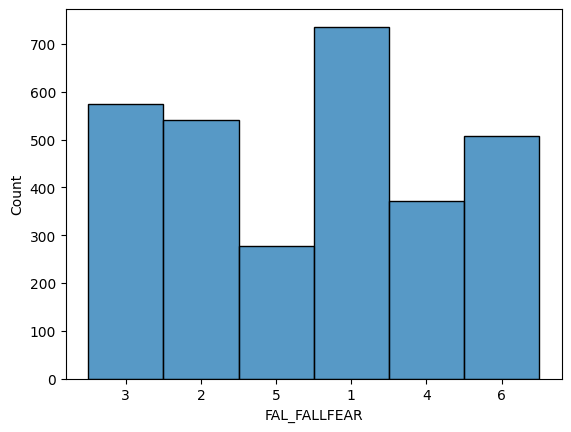

In [61]:
# histogram/bar plot of fear of falling scale, as the numbers are subjective representations of fear
sns.histplot(df['FAL_FALLFEAR'], bins=[1, 2, 3, 4, 5, 6]) # i tried to make the scale in order, but got stuck

<Axes: xlabel='FAL_FALLANY', ylabel='Count'>

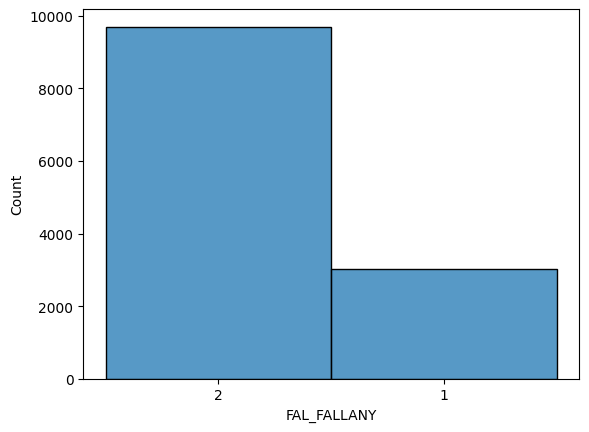

In [62]:
# presence of a fall is a categorical, yes/no variable
sns.histplot(df['FAL_FALLANY'])

I am not really seeing or noticing any outliers, but that could be in large part due to my data-cleaning, which took out people that didn't know or refused to provide information. There are fewer people with larger households, but it doesn't seem like an outlier.

<Axes: xlabel='HOU_D_HHTOT', ylabel='Density'>

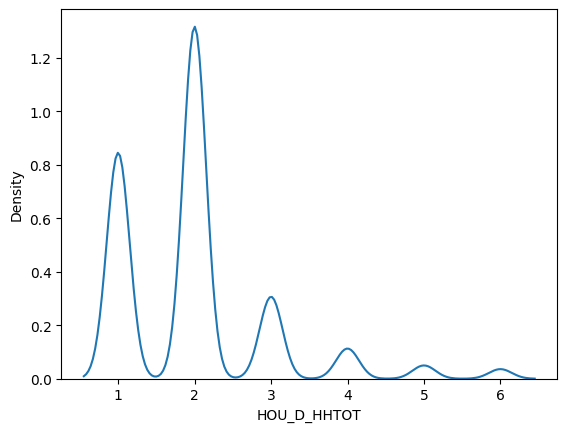

In [63]:
sns.kdeplot(df['HOU_D_HHTOT'])

My results don't require any transformations for rescaling, but this kernal density plot of the number of people in households variable shows some interesting trends that gives more insight into the elderly individuals on Medicare. Many of them either live alone, as seen by the peak of 0.8, or with one other person, seen by the max peak at over 1.2. This reflects the state of America's elderly, who often struggle with loneliness and the difficulties of remaining independent as they age.